In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[1]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

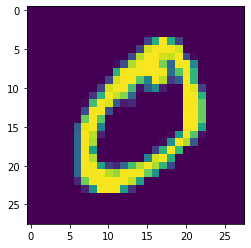

In [12]:
plt.imshow(single_image)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)
y_example[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [21]:
# normalize the data since we know range(0,255)
x_train = x_train/255
x_test = x_test/255

1.0


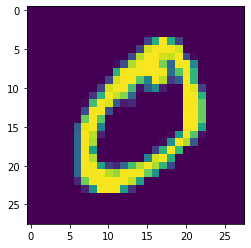

In [23]:
scaled_image = x_train[1]
print(scaled_image.max())
plt.imshow(scaled_image)

In [25]:
x_train.shape

(60000, 28, 28)

In [27]:
# batch size, width, height, color channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(28,28,1),
                 activation='relu'
                 )
          )
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# output layer for multiclass
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)


In [42]:
model.fit(x_train,
          y_cat_train,
          epochs=10,
          validation_data=(x_test, y_cat_test),
          callbacks=[early_stop]
          )

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1409 - accuracy: 0.9581 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0412 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0400 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0541 - val_accuracy: 0.9820


In [44]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140937,0.958067,0.057529,0.9827
1,0.047723,0.985550,0.041245,0.9867
2,0.030590,0.989733,0.040023,0.9863
3,0.020217,0.993883,0.054060,0.9820


<AxesSubplot:>

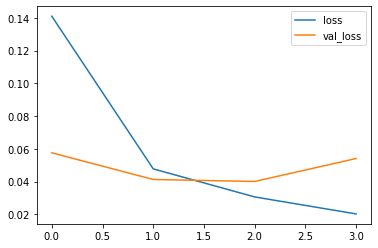

In [45]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

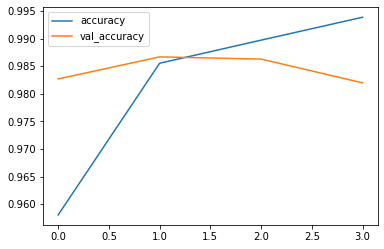

In [46]:
metrics[['accuracy', 'val_accuracy']].plot()

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9820


[0.05405953526496887, 0.9819999933242798]

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.92      0.99      0.96       892
           6       0.99      0.96      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [52]:
confusion_matrix(y_test, predictions)

array([[ 974,    0,    0,    1,    0,    4,    0,    0,    1,    0],
       [   0, 1117,    4,    0,    2,    4,    3,    1,    4,    0],
       [   0,    0, 1026,    2,    0,    0,    0,    3,    1,    0],
       [   0,    0,    3,  986,    0,   15,    0,    5,    1,    0],
       [   0,    0,    0,    0,  974,    0,    0,    0,    2,    6],
       [   0,    0,    1,    3,    0,  887,    1,    0,    0,    0],
       [   5,    1,    1,    1,    4,   20,  924,    0,    2,    0],
       [   0,    1,    9,    1,    0,    1,    0, 1015,    1,    0],
       [   3,    0,    3,    1,    0,    6,    1,    3,  952,    5],
       [   1,    3,    0,    0,    7,   23,    0,    9,    1,  965]])

<AxesSubplot:>

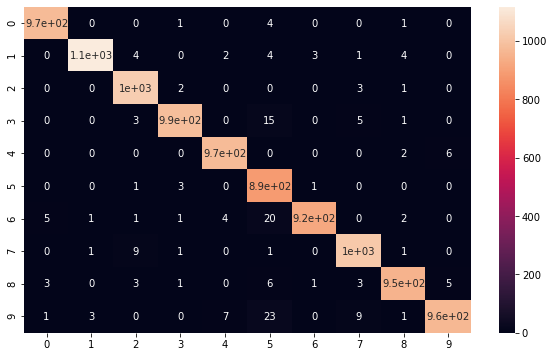

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

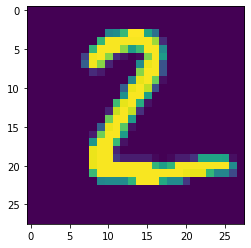

In [59]:
my_number = x_test[1]
plt.imshow(my_number.reshape(28,28))

In [60]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([2])